# Lead Score Case Study assignment  



### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
### Business Goal 

X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers.

To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

##  Step 1: Loading & Inspecting  data

In [2]:
leaddata = pd.read_csv('Leads.csv')
#leaddata.head()

In [4]:
leaddata.shape

(9240, 37)

In [5]:
leaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leaddata.describe() # Cehck numeric columns

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leaddata.isnull().sum() # Checking null values

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
round(leaddata.isnull().sum()/len(leaddata) * 100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- Several fields are having null values

In [9]:
leaddata[leaddata.duplicated(keep=False)] # Check for Duplicates

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


- There are No duplicate rows found

## Inspect values in cloumns

In [10]:
for column in leaddata:
    print()
    print('Inspecting Column :' + column)
    print('___________________________________________________')

    print(leaddata[column].astype('category').value_counts())
    print('___________________________________________________')


Inspecting Column :Prospect ID
___________________________________________________
fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________

Inspecting Column :Lead Number
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________

Inspecting Column :Lead Origin
__________

### Initial finding
- Below columns are to be deleted as ID is not important for analysis

   Prospect ID, Lead Number
   
    
- Below are not important for analysis as columns are having moslty only One value
    
    Do Not Call, 
    Search,
    What matters most to you in choosing a course,
    Magazine,
    Newspaper Article,
    X Education Forums,
    Newspaper,
    Digital Advertisement,
    Through Recommendations,
    Receive More Updates About Our Courses, 
    Update me on Supply Chain Content,
    Get updates on DM Content,
    I agree to pay the amount through cheque,
    
    
- Below having value as "Select" means they were not filled Let's fill them and nulls with Unknown 

    Specialization,
    How did you hear about X Education,
    Lead Profile,
    City,

## Step 2: Data Cleaning

- Converting to uniform lower case for string values


In [11]:
leaddata = leaddata.applymap(lambda s:s.lower() if type(s) == str else s)

- Drop unnecessary columns Prospect ID &  Lead Number (won't be of any use in the analysis)


In [12]:
leaddata.drop(['Prospect ID', 'Lead Number'], 1, inplace=True)

- Delete columns are having only One value( Mostly ) 

In [13]:
col1 = ['Do Not Call',
        'Search',
        'What matters most to you in choosing a course',
        'Magazine',
        'Newspaper Article',
        'X Education Forums',
        'Newspaper', 
        'Digital Advertisement',
        'Through Recommendations',
        'Receive More Updates About Our Courses', 
        'Update me on Supply Chain Content',
        'Get updates on DM Content', 
        'I agree to pay the amount through cheque']
leaddata.drop(col1, 1, inplace=True)

- Columns having value as "Select" means they were not filled let's fill them and nulls with Unknown 

In [14]:
col2 = ['Specialization',
        'How did you hear about X Education',
        'Lead Profile',
        'City']
leaddata[col2] = leaddata[col2].replace('select', 'unknown')


In [15]:
for column in leaddata:
    print()
    print('Inspecting Column :' + column)
    print('___________________________________________________')

    print(leaddata[column].astype('category').value_counts())
    print('___________________________________________________')


Inspecting Column :Lead Origin
___________________________________________________
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: Lead Origin, dtype: int64
___________________________________________________

Inspecting Column :Lead Source
___________________________________________________
google               2873
direct traffic       2543
olark chat           1755
organic search       1154
reference             534
welingak website      142
referral sites        125
facebook               55
bing                    6
click2call              4
press_release           2
social media            2
live chat               2
pay per click ads       1
nc_edm                  1
testone                 1
welearn                 1
welearnblog_home        1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64
____________________________________

- Value Count where conversion happened

In [16]:
for column in leaddata:
    print()
    print('Inspecting Column :' + column)
    print('___________________________________________________')

    print(leaddata[leaddata['Converted'] ==1][column].astype('category').value_counts())
    print('___________________________________________________')


Inspecting Column :Lead Origin
___________________________________________________
landing page submission    1768
api                        1115
lead add form               664
lead import                  13
quick add form                1
Name: Lead Origin, dtype: int64
___________________________________________________

Inspecting Column :Lead Source
___________________________________________________
google              1147
direct traffic       818
reference            490
olark chat           448
organic search       436
welingak website     140
referral sites        31
facebook              13
click2call             3
live chat              2
welearn                1
social media           1
nc_edm                 1
bing                   1
Name: Lead Source, dtype: int64
___________________________________________________

Inspecting Column :Do Not Email
___________________________________________________
no     3443
yes     118
Name: Do Not Email, dtype: int64
____________

####  Major Findings:
- Lead source Google has most conversion followed by direct traffic
- in Specialization Opting for 'management' courses has highest conversion
- Occupation: Unemployeds mjorly converted
- From Mumbai City  mjorly converted


- Handling missing values

In [17]:
round(leaddata.isnull().sum()/len(leaddata) * 100,2)

Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              29.32
City                                      15.37
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score                45.65
A free copy of Mastering The Interview  

- Check null values for numeric columns

In [18]:
leaddata["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [19]:
# Replace nan vslues with median value 3
leaddata["TotalVisits"] = leaddata["TotalVisits"].replace(np.nan, 3.0)

In [20]:
leaddata["Page Views Per Visit"].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [21]:
# Replace nan vslues with median value 2
leaddata["Page Views Per Visit"] = leaddata["Page Views Per Visit"].replace(np.nan, 2.0)

In [22]:
leaddata["Asymmetrique Activity Score"].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

In [23]:
# Replace nan vslues with median value 14
leaddata["Asymmetrique Activity Score"] = leaddata["Asymmetrique Activity Score"].replace(np.nan, 14.0)

In [24]:
leaddata["Asymmetrique Profile Score"].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

In [25]:
# Replace nan vslues with median value 16
leaddata["Asymmetrique Profile Score"] = leaddata["Asymmetrique Profile Score"].replace(np.nan, 16.0)

- Check null values for non-numeric columns

In [26]:
# Replace null with unknown where select was there previously
col2 = ['Specialization',
        'How did you hear about X Education',
        'Lead Profile',
        'City',
        'Asymmetrique Activity Index',
        'Asymmetrique Profile Index']
leaddata[col2] = leaddata[col2].replace(np.nan, 'unknown')


- #### missing values with Conversion 

In [27]:
leaddata[leaddata['Specialization'] == 'unknown']['Converted'].value_counts()/len(leaddata) *100

0    26.093074
1    10.487013
Name: Converted, dtype: float64

In [28]:
leaddata[leaddata['How did you hear about X Education'] == 'unknown']['Converted'].value_counts()/len(leaddata) *100

0    49.090909
1    29.372294
Name: Converted, dtype: float64

- From the above analysis we can see many convertion happend where values are null, so we can not afford delete rows with null values

In [29]:
col3 = ['Lead Source',
        'Last Activity',
        'Country',
        'What is your current occupation',
        'Tags',
        'Lead Quality',
        ]
leaddata[col3] = leaddata[col3].replace(np.nan, 'not sure')

In [30]:
round(leaddata.isnull().sum()/len(leaddata) * 100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Quality                              0.0
Lead Profile                              0.0
City                                      0.0
Asymmetrique Activity Index               0.0
Asymmetrique Profile Index                0.0
Asymmetrique Activity Score               0.0
Asymmetrique Profile Score                0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity             

In [31]:
leaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Country                                 9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  How did you hear about X Education      9240 non-null   obje

In [32]:
#Total conversion rate 
3561/9240

0.3853896103896104

- Now the data frame do not have any null value & Unnecessary columns have been dropped

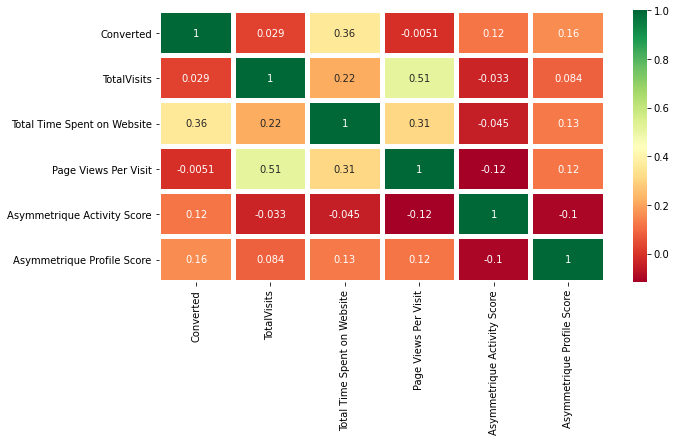

In [33]:
# Check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(leaddata.corr(),annot = True, cmap="RdYlGn",linewidth =4)
plt.show()

##### Outlier Treatment

In [34]:
leaddata.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440,14.166450,16.187446
std,0.486714,4.819024,548.021466,2.145781,1.033585,1.346358
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,16.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,14.000000,16.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

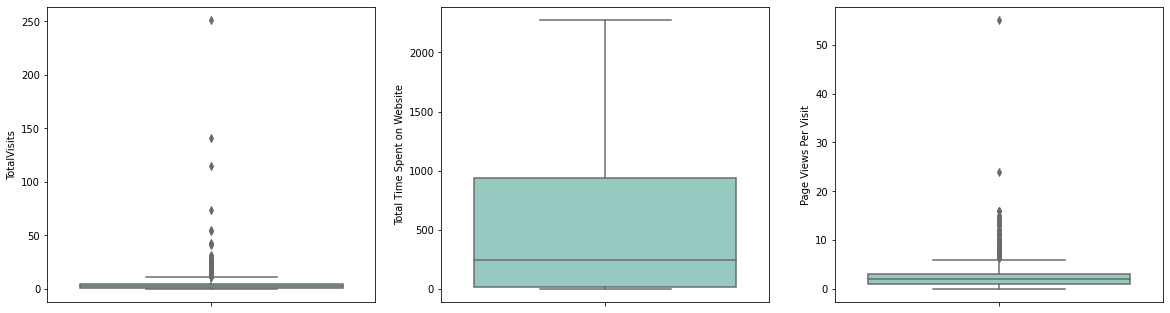

In [36]:
# Check the outliers in all the numeric columns
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leaddata)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leaddata)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leaddata)
plt.show()

- We can see 'TotalVisits' & 'Page Views Per Visit' are having outliers, & also 'Total Time Spent on Website' having high dominating values let's bin them, again we can not delete rows as any conversion is very crucial information

In [37]:
# bin 'TotalVisits_bin'
bin_1 = ['low', 'medium', 'high','very_high']
leaddata['TotalVisits_bin'] = pd.qcut(leaddata['TotalVisits'], q=[0,.25, .5, .75,1],labels=bin_1)
# bin 'Page Views Per Visit'
bin_2 = ['low', 'medium', 'high','very_high']
leaddata['PageViewsPerVisit_bin'] = pd.qcut(leaddata['Page Views Per Visit'], q=[ 0,.25, .5, .75,1],labels=bin_2)
# bin 'Page Views Per Visit'
bin_3 = ['low', 'medium', 'high', 'very_high']
leaddata['TimeSpentonWebsite_bin'] = pd.qcut(leaddata['Total Time Spent on Website'], q=[0, .25, .5, .75, 1],labels=bin_3)


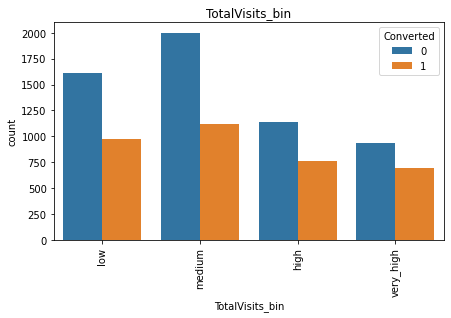

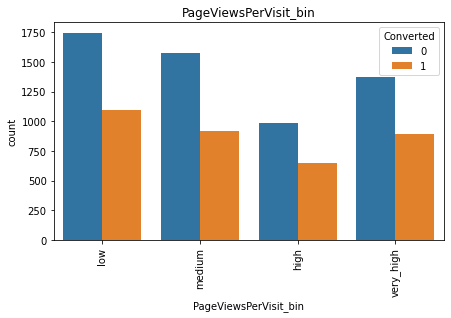

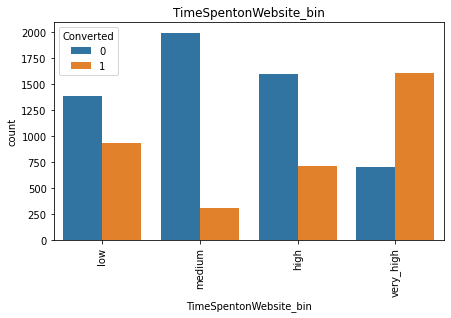

In [38]:
cat_col_0 = ['TotalVisits_bin',
             'PageViewsPerVisit_bin',
             'TimeSpentonWebsite_bin']
for col in  cat_col_0:
    plt.figure(figsize=(7,4)) 

    ax = sns.countplot(x = col,data = leaddata,hue = 'Converted')
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

In [39]:
# Delete unnecessary columns for whose binning already done
col3 = ['TotalVisits',
        'Total Time Spent on Website',
        'Page Views Per Visit']
leaddata.drop(col3, 1, inplace=True)

In [40]:
leaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Lead Origin                             9240 non-null   object  
 1   Lead Source                             9240 non-null   object  
 2   Do Not Email                            9240 non-null   object  
 3   Converted                               9240 non-null   int64   
 4   Last Activity                           9240 non-null   object  
 5   Country                                 9240 non-null   object  
 6   Specialization                          9240 non-null   object  
 7   How did you hear about X Education      9240 non-null   object  
 8   What is your current occupation         9240 non-null   object  
 9   Tags                                    9240 non-null   object  
 10  Lead Quality                            9240 non

In [41]:
round(leaddata.isnull().sum()/len(leaddata) * 100,2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Quality                              0.0
Lead Profile                              0.0
City                                      0.0
Asymmetrique Activity Index               0.0
Asymmetrique Profile Index                0.0
Asymmetrique Activity Score               0.0
Asymmetrique Profile Score                0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
TotalVisits_bin                           0.0
PageViewsPerVisit_bin                     0.0
TimeSpentonWebsite_bin            

In [42]:
leaddata['TotalVisits_bin'] = leaddata['TotalVisits_bin'].astype(object)
leaddata['PageViewsPerVisit_bin'] = leaddata['PageViewsPerVisit_bin'].astype(object)
leaddata['TimeSpentonWebsite_bin'] = leaddata['TimeSpentonWebsite_bin'].astype(object)


In [43]:
leaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   Last Activity                           9240 non-null   object 
 5   Country                                 9240 non-null   object 
 6   Specialization                          9240 non-null   object 
 7   How did you hear about X Education      9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  Lead Quality                            9240 non-null   obje

## Step 3: EDA Visualization

In [44]:
temp = leaddata.loc[:, leaddata.dtypes =='object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'TotalVisits_bin', 'PageViewsPerVisit_bin',
       'TimeSpentonWebsite_bin'],
      dtype='object')

In [45]:
col = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 
       'Lead Profile', 'City',  'A free copy of Mastering The Interview',
       'Last Notable Activity', 'TotalVisits_bin', 'PageViewsPerVisit_bin',
       'TimeSpentonWebsite_bin']

In [46]:
len(col)

14

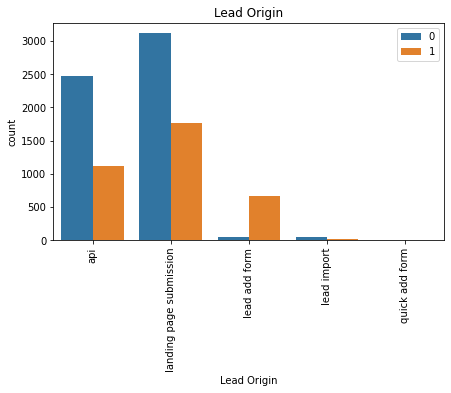

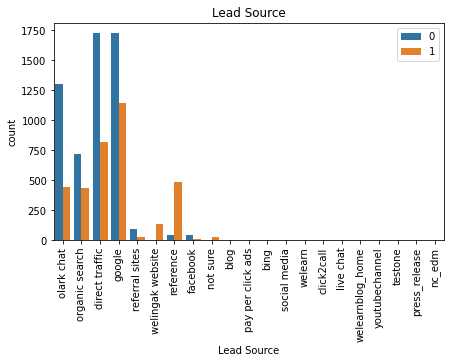

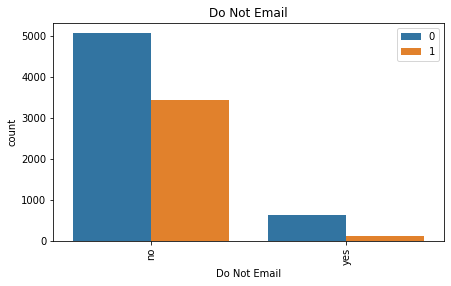

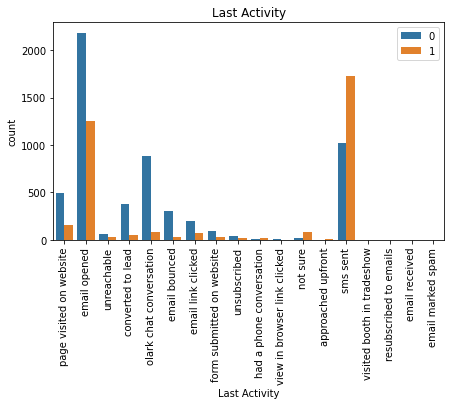

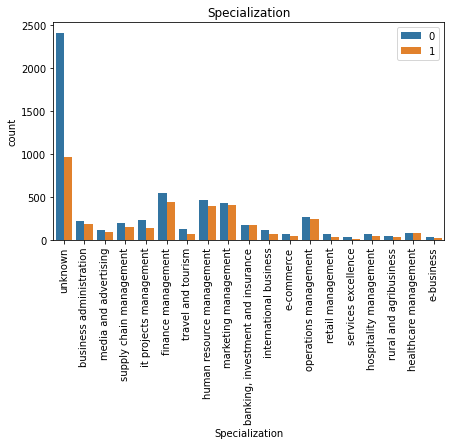

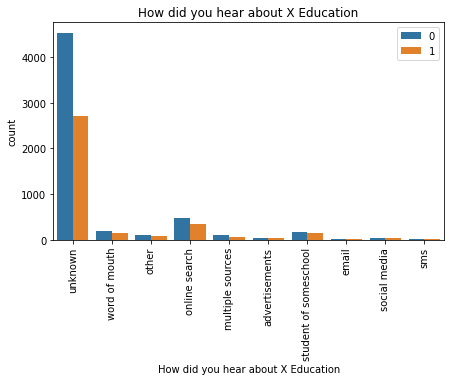

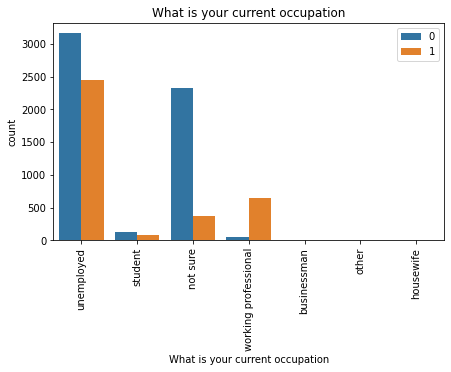

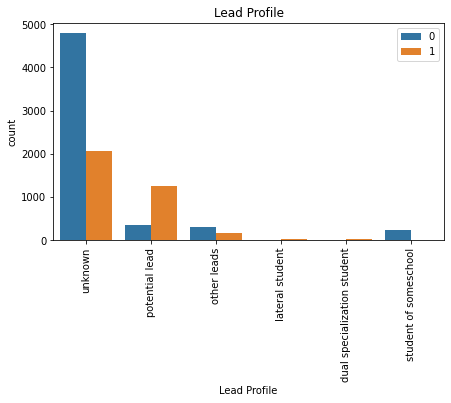

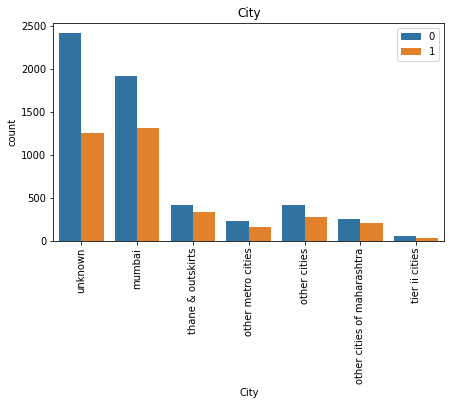

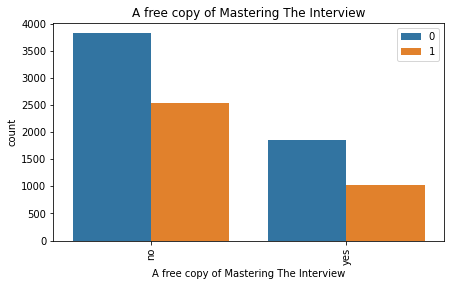

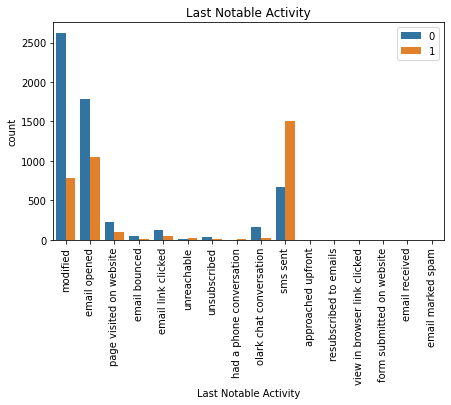

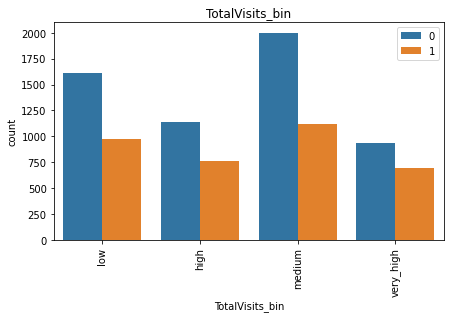

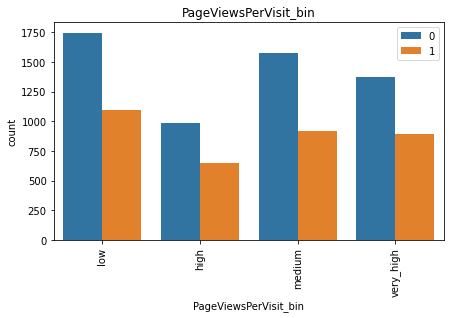

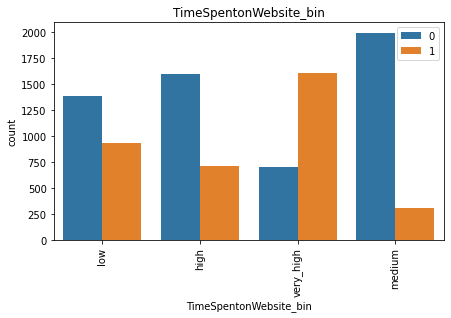

In [47]:
for c in  col:
    plt.figure(figsize=(7,4)) 

    ax = sns.countplot(x = c,data = leaddata,hue = 'Converted')
    plt.title(c)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90)
    plt.show()

####  Findings:
- Lead source Google has most conversion followed by direct traffic
- Reference is having high conversion rate for referal people in lead source.
- Lead coming from add form having high conversion rate.
- conversion rate is very high for candidates spending more time in the website.
- in Specialization Opting for 'management' courses has high conversion rate
- Occupation: Unemployeds majorly converted,working professionals conversion rate is very high
- For the conversion the last activity mostly found text messaging action.



## Step 4: Data Preparation 

### Dummy variable creation

In [48]:
leaddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Do Not Email                            9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   Last Activity                           9240 non-null   object 
 5   Country                                 9240 non-null   object 
 6   Specialization                          9240 non-null   object 
 7   How did you hear about X Education      9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  Lead Quality                            9240 non-null   obje

In [49]:
# Check the columns which are of type 'object'

temp = leaddata.loc[:, leaddata.dtypes =='object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'TotalVisits_bin', 'PageViewsPerVisit_bin',
       'TimeSpentonWebsite_bin'],
      dtype='object')

In [50]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leaddata[['Lead Origin',
                                 'Lead Source',
                                 'Do Not Email',
                                 'Last Activity',
                                 'Country',
                                 'Specialization',
                                 'How did you hear about X Education',
                                 'What is your current occupation',
                                 'Tags',
                                 'Lead Quality',
                                 'Lead Profile',
                                 'City',
                                 'Asymmetrique Activity Index',
                                 'Asymmetrique Profile Index',
                                 'A free copy of Mastering The Interview',
                                 'Last Notable Activity',
                                 'TotalVisits_bin',
                                 'PageViewsPerVisit_bin',
                                 'TimeSpentonWebsite_bin']], 
                       drop_first=True)

# Add the results to the master dataframe
leaddata = pd.concat([leaddata, dummy], axis=1)

In [51]:
list(leaddata.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'TotalVisits_bin',
 'PageViewsPerVisit_bin',
 'TimeSpentonWebsite_bin',
 'Lead Origin_landing page submission',
 'Lead Origin_lead add form',
 'Lead Origin_lead import',
 'Lead Origin_quick add form',
 'Lead Source_blog',
 'Lead Source_click2call',
 'Lead Source_direct traffic',
 'Lead Source_facebook',
 'Lead Source_google',
 'Lead Source_live chat',
 'Lead Source_nc_edm',
 'Lead Source_not sure',
 'Lead Source_olark chat',
 'Lead Source_organic search',
 'Lead Source_pay per click ads',
 'Lead Source_press_release',
 'Lead Source_reference',
 'Lead Source_r

- Delete unknow columns which defines the missing values

In [52]:
# delete columns
col4 = ['Specialization',
        'How did you hear about X Education',
        'Lead Profile',
        'City',
        'Asymmetrique Activity Index',
        'Asymmetrique Profile Index']
for col in col4:
    col_del =col+'_unknown'
    leaddata.drop([col_del], 1, inplace=True)


In [53]:
list(leaddata.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Converted',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'TotalVisits_bin',
 'PageViewsPerVisit_bin',
 'TimeSpentonWebsite_bin',
 'Lead Origin_landing page submission',
 'Lead Origin_lead add form',
 'Lead Origin_lead import',
 'Lead Origin_quick add form',
 'Lead Source_blog',
 'Lead Source_click2call',
 'Lead Source_direct traffic',
 'Lead Source_facebook',
 'Lead Source_google',
 'Lead Source_live chat',
 'Lead Source_nc_edm',
 'Lead Source_not sure',
 'Lead Source_olark chat',
 'Lead Source_organic search',
 'Lead Source_pay per click ads',
 'Lead Source_press_release',
 'Lead Source_reference',
 'Lead Source_r

- Drop the variables for which the dummy variables have been created

In [54]:
leaddata =  leaddata.drop([  'Lead Origin',
                             'Lead Source',
                             'Do Not Email',
                             'Last Activity',
                             'Country',
                             'Specialization',
                             'How did you hear about X Education',
                             'What is your current occupation',
                             'Tags',
                             'Lead Quality',
                             'Lead Profile',
                             'City',
                             'Asymmetrique Activity Index',
                             'Asymmetrique Profile Index',
                             'A free copy of Mastering The Interview',
                             'Last Notable Activity',
                             'TotalVisits_bin',
                             'PageViewsPerVisit_bin',
                             'TimeSpentonWebsite_bin'], 1)

#### Test-Train Split

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# Put all the feature variables in X

X = leaddata.drop(['Converted'], 1)
X.head()

,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_view in browser link clicked,TotalVisits_bin_low,TotalVisits_bin_medium,TotalVisits_bin_very_high,PageViewsPerVisit_bin_low,PageViewsPerVisit_bin_medium,PageViewsPerVisit_bin_very_high,TimeSpentonWebsite_bin_low,TimeSpentonWebsite_bin_medium,TimeSpentonWebsite_bin_very_high
0,15.0,15.0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,15.0,15.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.0,20.0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,13.0,17.0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,15.0,18.0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [57]:
# Put the target variable in y

y = leaddata['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# Split the dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Rescaling

- There are numeric variables present with different scales. Let's scale them

In [59]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()
X_train[['Asymmetrique Activity Score',
         'Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['Asymmetrique Activity Score',
                                                                  'Asymmetrique Profile Score']])
X_train.head()

,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_view in browser link clicked,TotalVisits_bin_low,TotalVisits_bin_medium,TotalVisits_bin_very_high,PageViewsPerVisit_bin_low,PageViewsPerVisit_bin_medium,PageViewsPerVisit_bin_very_high,TimeSpentonWebsite_bin_low,TimeSpentonWebsite_bin_medium,TimeSpentonWebsite_bin_very_high
1871,0.727273,0.444444,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6795,0.636364,0.555556,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3516,0.636364,0.555556,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8105,0.636364,0.444444,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3934,0.636364,0.555556,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


- ####  Inspecting training data

In [61]:
import seaborn as sns

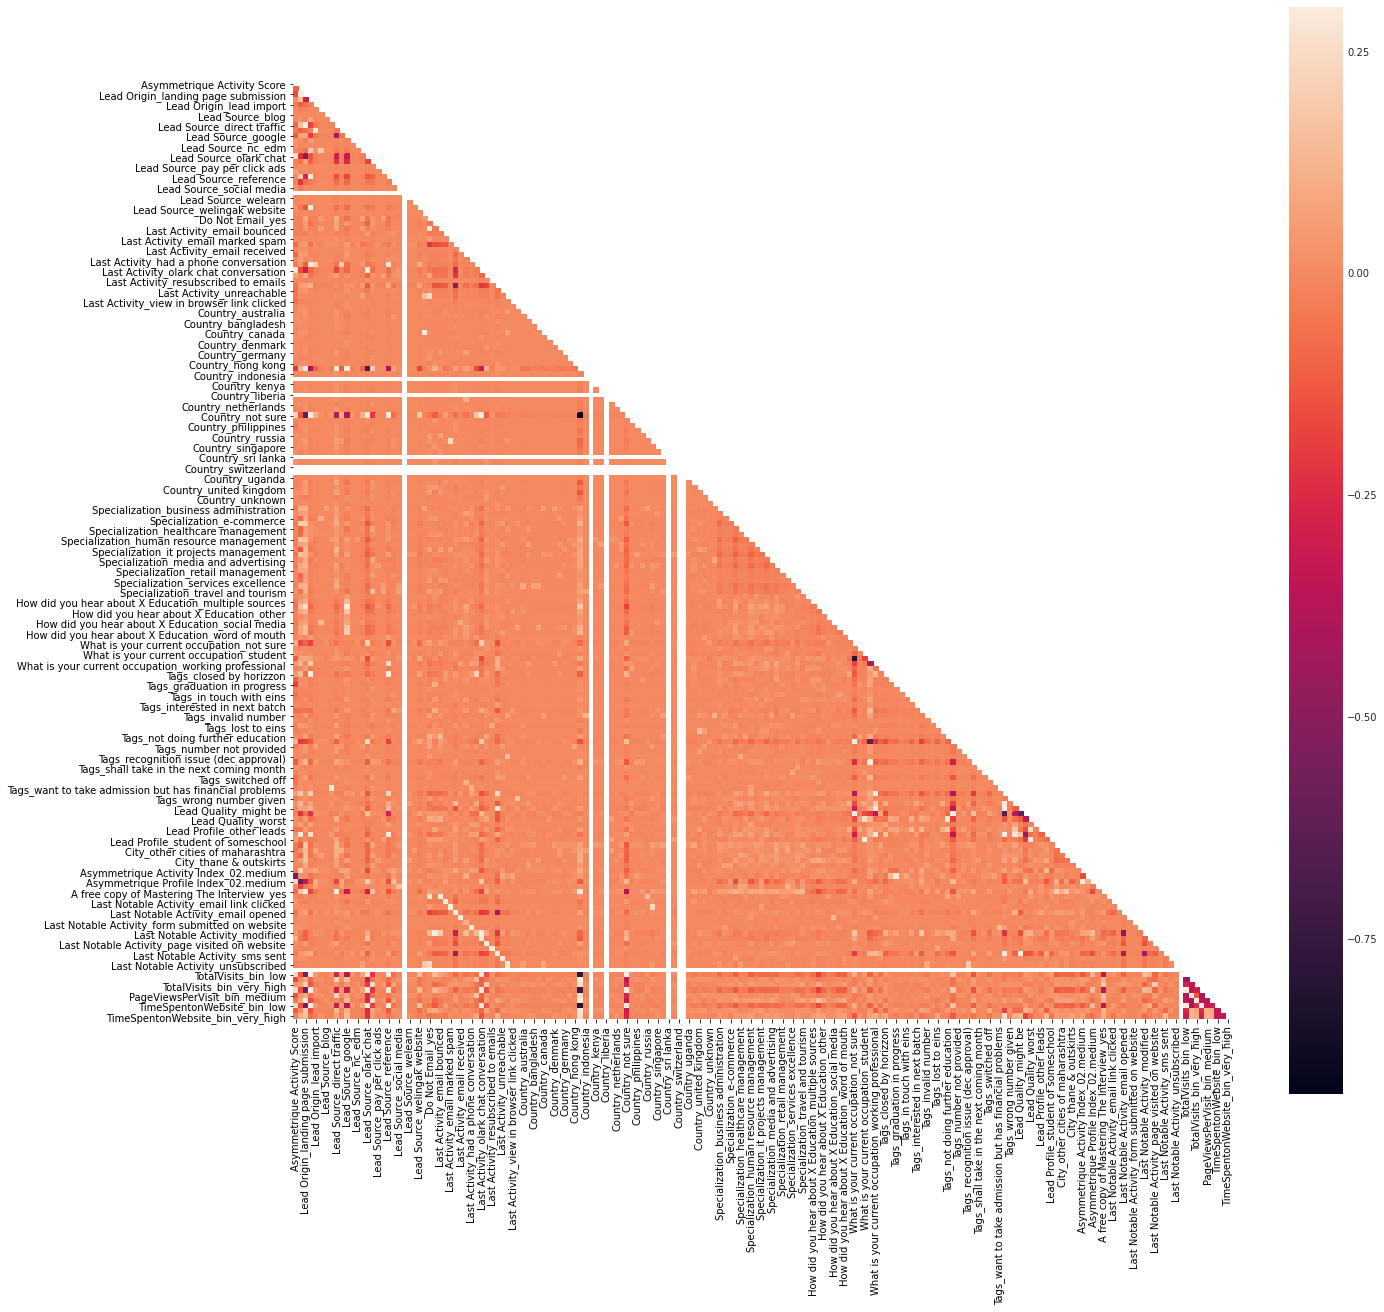

In [62]:
#  correlation 
corr_1 = X_train.corr()
mask = np.zeros_like(corr_1)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(21, 20))
with sns.axes_style("white"):
    ax = sns.heatmap(corr_1, mask=mask, vmax=.3, square=True);

In [63]:
X_train.corr()

,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Origin_quick add form,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_view in browser link clicked,TotalVisits_bin_low,TotalVisits_bin_medium,TotalVisits_bin_very_high,PageViewsPerVisit_bin_low,PageViewsPerVisit_bin_medium,PageViewsPerVisit_bin_very_high,TimeSpentonWebsite_bin_low,TimeSpentonWebsite_bin_medium,TimeSpentonWebsite_bin_very_high
Asymmetrique Activity Score,1.000000,-0.104740,-0.162963,0.009564,-0.037075,-0.002057,-0.002057,-0.003563,-0.084454,-0.037075,...,NaN,0.241691,-0.166424,0.029018,0.241303,-0.142298,-0.053259,0.224061,-0.119354,-0.010335
Asymmetrique Profile Score,-0.104740,1.000000,0.356872,0.151442,-0.108691,-0.029509,-0.001802,0.012877,0.149852,-0.107079,...,NaN,-0.139154,0.004265,0.057285,-0.158945,0.024159,0.081343,-0.142782,0.000410,0.102821
Lead Origin_landing page submission,-0.162963,0.356872,1.000000,-0.310845,-0.075762,-0.013156,0.011754,-0.022790,0.526186,-0.071415,...,NaN,-0.535748,0.100919,0.215523,-0.581370,0.095854,0.331086,-0.557917,0.192517,0.169489
Lead Origin_lead add form,0.009564,0.151442,-0.310845,1.000000,-0.021041,-0.003654,-0.003654,0.073316,-0.179365,-0.021041,...,NaN,0.336838,-0.091663,-0.129759,0.317466,-0.061470,-0.163399,0.347234,-0.151891,-0.075532
Lead Origin_lead import,-0.037075,-0.108691,-0.075762,-0.021041,1.000000,-0.000890,-0.000890,-0.001543,-0.043716,0.969542,...,NaN,0.042722,0.016890,-0.033090,0.037012,0.028936,-0.040475,0.053472,-0.006507,-0.020896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PageViewsPerVisit_bin_medium,-0.142298,0.024159,0.095854,-0.061470,0.028936,0.020228,-0.007645,0.002852,0.229382,0.028936,...,NaN,-0.381600,0.537579,-0.128435,-0.409222,1.000000,-0.347468,-0.331788,0.114014,0.111450
PageViewsPerVisit_bin_very_high,-0.053259,0.081343,0.331086,-0.163399,-0.040475,-0.007028,0.022001,-0.012175,0.002310,-0.035410,...,NaN,-0.350843,-0.408035,0.375808,-0.376238,-0.347468,1.000000,-0.295369,0.094061,0.109708
TimeSpentonWebsite_bin_low,0.224061,-0.142782,-0.557917,0.347234,0.053472,-0.007212,-0.007212,0.020597,-0.313998,0.048471,...,NaN,0.858802,-0.390916,-0.244596,0.799441,-0.331788,-0.295369,1.000000,-0.336226,-0.332222
TimeSpentonWebsite_bin_medium,-0.119354,0.000410,0.192517,-0.151891,-0.006507,-0.007209,-0.007209,-0.012488,0.128421,-0.006507,...,NaN,-0.263637,0.131822,0.070877,-0.247632,0.114014,0.094061,-0.336226,1.000000,-0.332086


- not much clear information can be gathered from above correlation, lets go for the feature elemination part

### Step 5: Model building

In [64]:
import statsmodels.api as sm

In [65]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                          171
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 11 Nov 2021   Deviance:                          nan
Time:                        22:39:28   Pearson chi2:                 3.01e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                    -9.008e+13   6.87e+07  -1.31e+06      0.000   -9.01e+13   -9.01e+13
Asymmetrique Activity Score                               3.311e+15   1.54e+07   2.16e+08      0.000    3.31e+15    3.31e+15
Asymmetrique Profile Score                               -1.007e+15   1.35e+07  -7.48e+07      0.000   -1.01e+15   -1.01e+15
Lead Origin_landing page submission                      -2.157e+14   4.23e+06   -5.1e+07      0.000   -2.16e+14   -2.16e+14
Lead Origin_lead add form                                -1.199e+15   3.68e+07  -3.26e+07      0.000    -1.2e+15    -1.2e+15
Lead Origin_lead import                                   1.059e+15   5.38e+07   1.97e+07      0.000    1.06e+15    1.06e+15
Lead Origin_quick add form                                  3.6e+15   7.92e+07   4.54e+07      0.000     3.6e+15     3.6e+15
Lead Source_blog                                         -3.759e+15   7.79e+07  -4.83e+07      0.000   -3.76e+15   -3.76e+15
Lead Source_click2call                                    -6.36e+14   6.73e+07  -9.45e+06      0.000   -6.36e+14   -6.36e+14
Lead Source_direct traffic                               -8.813e+14    3.9e+07  -2.26e+07      0.000   -8.81e+14   -8.81e+14
Lead Source_facebook                                     -2.802e+15   6.61e+07  -4.24e+07      0.000    -2.8e+15    -2.8e+15
Lead Source_google                                       -9.192e+14    3.9e+07  -2.36e+07      0.000   -9.19e+14   -9.19e+14
Lead Source_live chat                                     2.395e+15   7.17e+07   3.34e+07      0.000     2.4e+15     2.4e+15
Lead Source_nc_edm                                        3.657e+15    7.8e+07   4.69e+07      0.000    3.66e+15    3.66e+15
Lead Source_not sure                                      3.277e+14   5.48e+07   5.98e+06      0.000    3.28e+14    3.28e+14
Lead Source_olark chat                                   -1.058e+15   3.95e+07  -2.68e+07      0.000   -1.06e+15   -1.06e+15
Lead Source_organic search                               -8.909e+14    3.9e+07  -2.28e+07      0.000   -8.91e+14   -8.91e+14
Lead Source_pay per click ads                            -3.568e+15   7.78e+07  -4.59e+07      0.000   -3.57e+15   -3.57e+15
Lead Source_press_release                                -3.793e+15    6.2e+07  -6.12e+07      0.000   -3.79e+15   -3.79e+15
Lead Source_reference                                    -7.795e+13   5.37e+07  -1.45e+06      0.000   -7.79e+13   -7.79e+13
Lead Source_referral sites                               -1.141e+15   3.97e+07  -2.87e+07      0.000   -1.14e+15   -1.14e+15
Lead Source_social media                                  1.098e+14   6.22e+07   1.

- #### There are huge number of features for manual selection, Let's select a small set of features using RFE.

In [66]:
# Import 'LogisticRegression' 
from sklearn.linear_model import LogisticRegression

# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [67]:
# create a LogisticRegression object
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Testing Accuracy")
print(logreg.score(X_test,y_test))

predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.9429499072356216
Testing Accuracy
0.395021645021645
[[   0 1677]
 [   0 1095]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1677
           1       0.40      1.00      0.57      1095

    accuracy                           0.40      2772
   macro avg       0.20      0.50      0.28      2772
weighted avg       0.16      0.40      0.22      2772



- Not a good model at all with logistic regression above

### Feature selection 
- Running RFE with 20 variables as output

In [68]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [69]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False,  True,  True,  True, False,
       False,  True,

In [70]:
# featuresselected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 69),
 ('Lead Origin_landing page submission', False, 48),
 ('Lead Origin_lead add form', False, 56),
 ('Lead Origin_lead import', False, 61),
 ('Lead Origin_quick add form', False, 77),
 ('Lead Source_blog', False, 115),
 ('Lead Source_click2call', False, 80),
 ('Lead Source_direct traffic', False, 103),
 ('Lead Source_facebook', False, 15),
 ('Lead Source_google', False, 104),
 ('Lead Source_live chat', False, 147),
 ('Lead Source_nc_edm', False, 20),
 ('Lead Source_not sure', False, 24),
 ('Lead Source_olark chat', False, 72),
 ('Lead Source_organic search', False, 102),
 ('Lead Source_pay per click ads', False, 150),
 ('Lead Source_press_release', False, 118),
 ('Lead Source_reference', False, 65),
 ('Lead Source_referral sites', False, 101),
 ('Lead Source_social media', False, 125),
 ('Lead Source_testone', False, 158),
 ('Lead Source_welearn', False, 144),
 ('Lead Source_welearnblog_home', False, 10

In [71]:
# variables shortlisted by RFE
col = X_train.columns[rfe.support_]
col

Index(['Asymmetrique Activity Score', 'Lead Source_welingak website',
       'Last Activity_sms sent', 'What is your current occupation_not sure',
       'Tags_busy', 'Tags_closed by horizzon', 'Tags_in touch with eins',
       'Tags_invalid number', 'Tags_lateral student', 'Tags_lost to eins',
       'Tags_not sure', 'Tags_number not provided', 'Tags_ringing',
       'Tags_switched off', 'Tags_will revert after reading the email',
       'Tags_wrong number given', 'Lead Quality_not sure',
       'Lead Quality_worst', 'Last Notable Activity_modified',
       'TimeSpentonWebsite_bin_very_high'],
      dtype='object')

In [72]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Asymmetrique Activity Score               6468 non-null   float64
 1   Lead Source_welingak website              6468 non-null   uint8  
 2   Last Activity_sms sent                    6468 non-null   uint8  
 3   What is your current occupation_not sure  6468 non-null   uint8  
 4   Tags_busy                                 6468 non-null   uint8  
 5   Tags_closed by horizzon                   6468 non-null   uint8  
 6   Tags_in touch with eins                   6468 non-null   uint8  
 7   Tags_invalid number                       6468 non-null   uint8  
 8   Tags_lateral student                      6468 non-null   uint8  
 9   Tags_lost to eins                         6468 non-null   uint8  
 10  Tags_not sure                    

In [75]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1124.4
Date:                Thu, 11 Nov 2021   Deviance:                       2248.7
Time:                        22:40:02   Pearson chi2:                 1.22e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.3604      0.515    -12.343      0.000      -7.370      -5.350
Asymmetrique Activity Score                  5.1032      0.631      8.090      0.000       3.867       6.340
Lead Source_welingak website                 3.1834      0.757      4.206      0.000       1.700       4.667
Last Activity_sms sent                       2.2634      0.132     17.143      0.000       2.005       2.522
What is your current occupation_not sure    -2.6235      0.157    -16.717      0.000      -2.931      -2.316
Tags_busy                                    1.8122      0.310      5.851      0.000       1.205       2.419
Tags_closed by horizzon                      9.0039      1.035      8.698      0.000       6.975      11.033
Tags_in touch with eins                      2.8531      0.933      3.059      0.002       1.025       4.681
Tags_invalid number                         -2.0847      1.072     -1.945      0.052      -4.185       0.016
Tags_lateral student                        26.4279   7.41e+04      0.000      1.000   -1.45e+05    1.45e+05
Tags_lost to eins                            9.5271      0.806     11.819      0.000       7.947      11.107
Tags_not sure                                3.3510      0.254     13.169      0.000       2.852       3.850
Tags_number not provided                   -22.5347   2.41e+04     -0.001      0.999   -4.72e+04    4.72e+04
Tags_ringing                                -2.0283      0.308     -6.584      0.000      -2.632      -1.425
Tags_switched off                           -2.2916      0.571     -4.011      0.000      -3.411      -1.172
Tags_will revert after reading the email     5.8104      0.297     19.542      0.000       5.228       6.393
Tags_wrong number given                    -22.3593   2.07e+04     -0.001      0.999   -4.06e+04    4.05e+04
Lead Quality_not sure                       -0.4142      0.235     -1.765      0.078      -0.874       0.046
Lead Quality_worst                          -2.5159      0.720     -3.494      0.000      -3.927      -1.105
Last Notable Activity_modified              -1.5410      0.129    -11.975      0.000      -1.793      -1.289
TimeSpentonWebsite_bin_very_high             1.8667      0.127     14.677      0.000       1.617       2.116
============================================================================================================
"""

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6468 entries, 1871 to 5640
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Asymmetrique Activity Score               6468 non-null   float64
 1   Lead Source_welingak website              6468 non-null   uint8  
 2   Last Activity_sms sent                    6468 non-null   uint8  
 3   What is your current occupation_not sure  6468 non-null   uint8  
 4   Tags_busy                                 6468 non-null   uint8  
 5   Tags_closed by horizzon                   6468 non-null   uint8  
 6   Tags_in touch with eins                   6468 non-null   uint8  
 7   Tags_invalid number                       6468 non-null   uint8  
 8   Tags_lateral student                      6468 non-null   uint8  
 9   Tags_lost to eins                         6468 non-null   uint8  
 10  Tags_not sure                    

In [77]:
# Delete least significant columns with p ~ 1 
X_train =  X_train.drop([  'Tags_wrong number given',
                             'Tags_number not provided',
                             'Tags_lateral student'], 1)

In [78]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1136.1
Date:                Thu, 11 Nov 2021   Deviance:                       2272.1
Time:                        22:40:46   Pearson chi2:                 1.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -6.4255      0.506    -12.703      0.000      -7.417      -5.434
Asymmetrique Activity Score                  5.1664      0.629      8.214      0.000       3.934       6.399
Lead Source_welingak website                 3.1725      0.756      4.196      0.000       1.691       4.654
Last Activity_sms sent                       2.2526      0.131     17.239      0.000       1.996       2.509
What is your current occupation_not sure    -2.6201      0.157    -16.741      0.000      -2.927      -2.313
Tags_busy                                    1.9328      0.303      6.385      0.000       1.339       2.526
Tags_closed by horizzon                      9.0232      1.033      8.739      0.000       6.999      11.047
Tags_in touch with eins                      2.9263      0.936      3.125      0.002       1.091       4.762
Tags_invalid number                         -1.9875      1.072     -1.854      0.064      -4.088       0.113
Tags_lost to eins                            9.6210      0.805     11.953      0.000       8.043      11.199
Tags_not sure                                3.4743      0.248     13.984      0.000       2.987       3.961
Tags_ringing                                -1.9165      0.300     -6.392      0.000      -2.504      -1.329
Tags_switched off                           -2.1918      0.568     -3.862      0.000      -3.304      -1.079
Tags_will revert after reading the email     5.8327      0.287     20.294      0.000       5.269       6.396
Lead Quality_not sure                       -0.5194      0.229     -2.270      0.023      -0.968      -0.071
Lead Quality_worst                          -2.5644      0.718     -3.569      0.000      -3.973      -1.156
Last Notable Activity_modified              -1.5049      0.128    -11.778      0.000      -1.755      -1.254
TimeSpentonWebsite_bin_very_high             1.8503      0.126     14.644      0.000       1.603       2.098
============================================================================================================
"""

In [79]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [80]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                    Features    VIF
0                Asymmetrique Activity Score  15.89
13                     Lead Quality_not sure   8.17
9                              Tags_not sure   8.04
3   What is your current occupation_not sure   4.69
12  Tags_will revert after reading the email   4.46
10                              Tags_ringing   2.16
14                        Lead Quality_worst   1.89
15            Last Notable Activity_modified   1.84
2                     Last Activity_sms sent   1.66
5                    Tags_closed by horizzon   1.50
16          TimeSpentonWebsite_bin_very_high   1.47
11                         Tags_switched off   1.24
4                                  Tags_busy   1.21
8                          Tags_lost to eins   1.17
1               Lead Source_welingak website   1.13
7                        Tags_invalid number   1.06
6                    Tags_in touch with eins   1.01


Removing column "Asymmetrique Activity Score" as it has a high VIF

In [81]:
X_train = X_train.drop([  'Asymmetrique Activity Score'], 1)

In [82]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                    Features   VIF
10                         Tags_switched off  1.16
3                                  Tags_busy  1.15
0               Lead Source_welingak website  1.13
7                          Tags_lost to eins  1.12
4                    Tags_closed by horizzon  1.11
6                        Tags_invalid number  1.04
5                    Tags_in touch with eins  1.01
13                        Lead Quality_worst  0.42
2   What is your current occupation_not sure  0.25
11  Tags_will revert after reading the email  0.17
9                               Tags_ringing  0.16
1                     Last Activity_sms sent  0.13
8                              Tags_not sure  0.13
15          TimeSpentonWebsite_bin_very_high  0.06
14            Last Notable Activity_modified  0.05
12                     Lead Quality_not sure  0.04


In [83]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1170.3
Date:                Thu, 11 Nov 2021   Deviance:                       2340.7
Time:                        22:41:13   Pearson chi2:                 1.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.0113      0.253    -11.908      0.000      -3.507      -2.516
Lead Source_welingak website                 3.1118      0.752      4.140      0.000       1.639       4.585
Last Activity_sms sent                       2.1002      0.124     16.889      0.000       1.856       2.344
What is your current occupation_not sure    -2.5440      0.151    -16.856      0.000      -2.840      -2.248
Tags_busy                                    1.9946      0.298      6.682      0.000       1.410       2.580
Tags_closed by horizzon                      9.0665      1.031      8.794      0.000       7.046      11.087
Tags_in touch with eins                      2.3616      0.835      2.830      0.005       0.726       3.997
Tags_invalid number                         -1.9115      1.069     -1.788      0.074      -4.006       0.183
Tags_lost to eins                            9.3001      0.783     11.870      0.000       7.764      10.836
Tags_not sure                                3.5288      0.244     14.468      0.000       3.051       4.007
Tags_ringing                                -1.9046      0.296     -6.433      0.000      -2.485      -1.324
Tags_switched off                           -2.1600      0.561     -3.847      0.000      -3.260      -1.060
Tags_will revert after reading the email     5.8634      0.281     20.867      0.000       5.313       6.414
Lead Quality_not sure                       -0.5394      0.224     -2.407      0.016      -0.979      -0.100
Lead Quality_worst                          -2.5240      0.728     -3.469      0.001      -3.950      -1.098
Last Notable Activity_modified              -1.4928      0.126    -11.823      0.000      -1.740      -1.245
TimeSpentonWebsite_bin_very_high             1.7840      0.123     14.497      0.000       1.543       2.025
============================================================================================================
"""

- Column "Tags_invalid number"  as it has a high pvalue is insignificant >.05

In [84]:
X_train = X_train.drop([  'Tags_invalid number'], 1)

In [85]:
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1173.0
Date:                Thu, 11 Nov 2021   Deviance:                       2345.9
Time:                        22:41:24   Pearson chi2:                 1.19e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.1309      0.251    -12.453      0.000      -3.624      -2.638
Lead Source_welingak website                 3.1099      0.751      4.140      0.000       1.638       4.582
Last Activity_sms sent                       2.0780      0.124     16.821      0.000       1.836       2.320
What is your current occupation_not sure    -2.5397      0.151    -16.865      0.000      -2.835      -2.245
Tags_busy                                    2.1276      0.295      7.214      0.000       1.550       2.706
Tags_closed by horizzon                      9.1766      1.031      8.902      0.000       7.156      11.197
Tags_in touch with eins                      2.4837      0.833      2.981      0.003       0.851       4.117
Tags_lost to eins                            9.4180      0.783     12.022      0.000       7.883      10.953
Tags_not sure                                3.6524      0.241     15.145      0.000       3.180       4.125
Tags_ringing                                -1.7678      0.292     -6.050      0.000      -2.341      -1.195
Tags_switched off                           -2.0215      0.559     -3.614      0.000      -3.118      -0.925
Tags_will revert after reading the email     5.9786      0.280     21.356      0.000       5.430       6.527
Lead Quality_not sure                       -0.5444      0.224     -2.431      0.015      -0.983      -0.105
Lead Quality_worst                          -2.5965      0.725     -3.581      0.000      -4.018      -1.175
Last Notable Activity_modified              -1.4790      0.126    -11.723      0.000      -1.726      -1.232
TimeSpentonWebsite_bin_very_high             1.7918      0.123     14.566      0.000       1.551       2.033
============================================================================================================
"""

In [86]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                                    Features   VIF
9                          Tags_switched off  1.15
3                                  Tags_busy  1.14
0               Lead Source_welingak website  1.13
6                          Tags_lost to eins  1.12
4                    Tags_closed by horizzon  1.11
5                    Tags_in touch with eins  1.01
12                        Lead Quality_worst  0.42
2   What is your current occupation_not sure  0.25
10  Tags_will revert after reading the email  0.17
8                               Tags_ringing  0.16
1                     Last Activity_sms sent  0.13
7                              Tags_not sure  0.13
14          TimeSpentonWebsite_bin_very_high  0.06
13            Last Notable Activity_modified  0.05
11                     Lead Quality_not sure  0.04


- Now All the variabels seems significant , and VIF is also in range 

In [87]:
#  predict values on the train set
y_train_pred = res.predict(X_train_sm)

In [88]:
# Reshape
y_train_pred = y_train_pred.values.reshape(-1)

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [89]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.004307
1,0,0.494269
2,0,0.004307
3,0,0.263287
4,0,0.182134


### Substituting 0 or 1 with the cut off as 0.5

In [90]:

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.004307,0
1,0,0.494269,0
2,0,0.004307,0
3,0,0.263287,0
4,0,0.182134,0


## Step 6: Model Evaluation

In [91]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [92]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3874  128]
 [ 321 2145]]


In [93]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9305813234384663

In [94]:
TN = confusion[0,0] # true negatives
TP = confusion[1,1] # true positive
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

- We need to prioritise sensitivity more as we can not afford information about converted.

In [95]:
# Calculate the sensitivity 
TP/(TP+FN)

0.8698296836982968

In [96]:
# Calculate the specificity
TN/(TN+FP)

0.968015992003998

### Optimal cutoff

In [97]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )


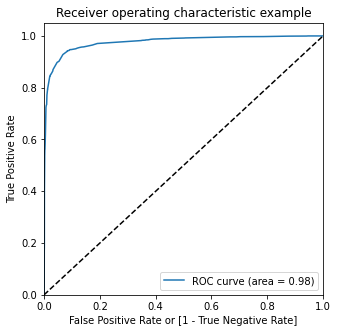

In [99]:
# Call the ROC function
import matplotlib.pyplot as plt
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- The area under the curve of the ROC is 0.98 which is exceptionally good. 
Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.


In [100]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.004307,0,1,0,0,0,0,0,0,0,0,0
1,0,0.494269,0,1,1,1,1,1,0,0,0,0,0
2,0,0.004307,0,1,0,0,0,0,0,0,0,0,0
3,0,0.263287,0,1,1,1,0,0,0,0,0,0,0
4,0,0.182134,0,1,1,0,0,0,0,0,0,0,0


In [101]:

# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','f1'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    f1 = 2*(speci*sensi/(speci+sensi))
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,f1]
cutoff_df

,prob,accuracy,sensi,speci,f1
0.0,0.0,0.381262,1.000000,0.000000,0.000000
0.1,0.1,0.879561,0.964720,0.827086,0.890617
0.2,0.2,0.919759,0.947283,0.902799,0.924506
0.3,0.3,0.925943,0.940795,0.916792,0.928638
0.4,0.4,0.929654,0.902271,0.946527,0.923869
0.5,0.5,0.930581,0.869830,0.968016,0.916300
0.6,0.6,0.928417,0.859692,0.970765,0.911858
0.7,0.7,0.927180,0.844688,0.978011,0.906473
0.8,0.8,0.914193,0.795620,0.987256,0.881139
0.9,0.9,0.893321,0.735199,0.990755,0.844057


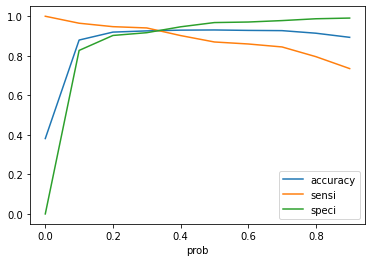

In [102]:
# Plotting the cutoff_df
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.004307,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.494269,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.004307,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.263287,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.182134,0,1,1,0,0,0,0,0,0,0,0,0


In [104]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9310451453308596

In [105]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3735,  267],
       [ 179, 2287]], dtype=int64)

In [106]:
# evaluate other metrics 
TN = confusion2[0,0] # true negatives
TP = confusion2[1,1] # true positive 
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Calculate Sensitivity
TP/(TP+FN)

0.9274128142741281

In [108]:
# Calculate Specificity
TN/(TN+FP)

0.9332833583208395

## Prediction with Test Data set

In [109]:
# Scaling numeric values
X_test[['Asymmetrique Activity Score',
         'Asymmetrique Profile Score']] = scaler.transform(X_test[['Asymmetrique Activity Score',
                                                                  'Asymmetrique Profile Score']])


In [110]:
# Take all the columns present in training set
col = X_train.columns

In [111]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]


In [112]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Lead Source_welingak website,Last Activity_sms sent,What is your current occupation_not sure,Tags_busy,Tags_closed by horizzon,Tags_in touch with eins,Tags_lost to eins,Tags_not sure,Tags_ringing,Tags_switched off,Tags_will revert after reading the email,Lead Quality_not sure,Lead Quality_worst,Last Notable Activity_modified,TimeSpentonWebsite_bin_very_high
4269,1.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
2376,1.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7766,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9199,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4359,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2152,1.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
7101,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5331,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1


In [113]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Lead Source_welingak website              2772 non-null   uint8
 1   Last Activity_sms sent                    2772 non-null   uint8
 2   What is your current occupation_not sure  2772 non-null   uint8
 3   Tags_busy                                 2772 non-null   uint8
 4   Tags_closed by horizzon                   2772 non-null   uint8
 5   Tags_in touch with eins                   2772 non-null   uint8
 6   Tags_lost to eins                         2772 non-null   uint8
 7   Tags_not sure                             2772 non-null   uint8
 8   Tags_ringing                              2772 non-null   uint8
 9   Tags_switched off                         2772 non-null   uint8
 10  Tags_will revert after reading the email  2772 non-null  

In [114]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [115]:
# Make a data frame for y predicted
y_pred_1 = pd.DataFrame(y_test_pred)

In [116]:
# y_test  dataframe
y_test_df = pd.DataFrame(y_test)

In [117]:
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [118]:
# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'}) # Rename new column
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.787042
1,1,0.992794
2,1,0.945198
3,0,0.005741
4,1,0.945198


In [119]:
# Make predictions on the test set using 0.35 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [120]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9303751803751804

In [121]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1545,  132],
       [  61, 1034]], dtype=int64)

In [122]:
TN = confusion2[0,0] # true negatives
TP = confusion2[1,1] # true positive 
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Calculate sensitivity on test data set
TP / float(TP+FN)

0.9442922374429223

In [124]:
# Calculate specificity on test data set
TN / float(TN+FP)

0.9212880143112702

In [145]:
y_pred_final['Converted'].head()

0    1
1    1
2    1
3    0
4    1
Name: Converted, dtype: int64

In [146]:
checking_test_1 = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_1['final_predicted'].value_counts()

1    1006
0      89
Name: final_predicted, dtype: int64

In [147]:
1006/(1006+89)

0.9187214611872146

- ## over 91% of conversion predicted accurately  

## Precision and Recall analysis

In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3874,  128],
       [ 321, 2145]], dtype=int64)

In [126]:
# Precision: TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9436867575890893

In [127]:
# Recall   : TP / TP + FN  : this value should be larger 
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8698296836982968

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

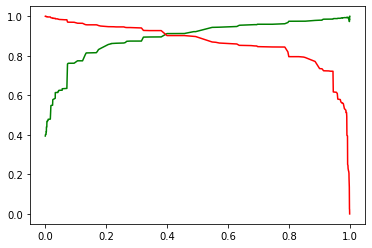

In [130]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [131]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.004307,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.494269,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.004307,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.263287,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.182134,0,1,1,0,0,0,0,0,0,0,0,0


In [132]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9298082869511441

In [133]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3789,  213],
       [ 241, 2225]], dtype=int64)

In [134]:
# Let's evaluate the other metrics as well
TN = confusion2[0,0] # true negatives
TP = confusion2[1,1] # true positive 
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Calculate Precision
TP/(TP+FP)

0.9126333059885152

In [136]:
# Calculate Recall
TP/(TP+FN)

0.9022708840227088

## Prediction on Test Set part2

In [137]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
y_test_pred = res.predict(sm.add_constant(X_test))
# Converting y_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)    
# Append y_test_df and y_pred_1                      
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1) 
y_pred_final.head()                      

,Converted,0
0,1,0.787042
1,1,0.992794
2,1,0.945198
3,0,0.005741
4,1,0.945198


In [138]:
# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [139]:
# Make predictions on the test set using 0.40 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

In [140]:
# Let's check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.9318181818181818

In [141]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1577,  100],
       [  89, 1006]], dtype=int64)

In [142]:
TN = confusion2[0,0] # true negatives
TP = confusion2[1,1] # true positive 
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Calculate Precision
TP/(TP+FP)

0.9095840867992767

In [144]:
# Calculate Recall
TP/(TP+FN)

0.9187214611872146

### Analysis Summary:

1. There were several columns were having missing values , on the other hand it is observed that these missing values are having conderable conversionn rate, so we can not afford deleting whole rows with missing values, in that case we will loose other column information influence convertion. So Missing & unknown values ae categorised separately and deleted after dummy field creation for them.
2. Through EDA it is found that :
    - Lead source Google has most conversion followed by direct traffic
    - Reference is having high conversion rate for referal people in lead source.
    - Lead coming from add form having high conversion rate.
    - conversion rate is very high for candidates spending more time in the website.
    - in Specialization Opting for 'management' courses has high conversion rate
    - Occupation: Unemployeds majorly converted,working professionals conversion rate is very high
    - For the conversion the last activity mostly found text messaging action.

3. variables that mattered the most in the potential conversion is : "The total time spend on the Website".
4. As per customer behaviour , converted customers do not like receiving email. 

  


### Conclusion :

- Optimal cut off of .35 & .44 found for Sensitivity-Specificity and Precision-Recall Metrics respectively for calculating the final prediction.

- In test data found that:

	Model Accuracy > 93% 
    
	Sensitivity > 94%
    
	Specificity > 92%
    
	which are closer to the respective values calculated using trained set.
    
	over 91% of conversion predicted accurately in test data set
- Hence overall this model seems to be good. 